In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
# Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
match_label = pd.read_csv('match_label.csv', index_col = 0)
fairness = pd.read_csv('Final_Education_Fairness.csv', index_col = 0)
F1 = pd.read_csv('Financial_F1.csv', index_col = 0)

In [ ]:
F1.year = [2000+int(str(i)[2:]) for i in F1.year]
F2.year = [2000+int(str(i)[2:]) for i in F2.year]

In [ ]:
total_profit = F1[['unitid', 'Total Profit', 'year']].append(F2[['unitid', 'Total Profit', 'year']])
total_profit = total_profit.merge(match_label, how='left', on=['year', 'unitid'])
total_profit = total_profit[~total_profit.label.isnull()]

/var/folders/d8/tgv6tbjx3jg2bvb_c8v342dr0000gn/T/ipykernel_35559/1714730466.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_profit = F1[['unitid', 'Total Profit', 'year']].append(F2[['unitid', 'Total Profit', 'year']])


In [ ]:
fairness = fairness.merge(match_label, how='left', on=['year', 'unitid'])
fairness = fairness[~fairness.label.isnull()]

In [ ]:
total_data = fairness.merge(total_profit.drop(['label'], axis=1), how='outer', on=['year', 'unitid'])
total_data

,year,unitid,Gini_gender,Gini_ethnics,Gini_income,edu_fairness_score,institution_type,label,Total Profit
0,2020,100654,0.475454,0.261646,0.947475,0.561525,Public,2.0,19179411.0
1,2020,100663,0.468154,0.612462,0.955800,0.678806,Public,2.0,157855385.0
2,2020,100690,0.478145,0.525058,NaN,NaN,Private not-for-profit,3.0,2201197.0
3,2020,100706,0.498441,0.518136,0.960979,0.659185,Public,2.0,6216878.0
4,2020,100724,0.467202,0.204233,0.946293,0.539243,Public,2.0,13616070.0
...,...,...,...,...,...,...,...,...,...
41110,2015,487630,0.458210,0.707294,NaN,NaN,Private for-profit,1.0,NaN
41111,2015,487649,0.477105,0.672133,NaN,NaN,NaN,1.0,0.0
41112,2015,487658,0.138817,0.475703,NaN,NaN,Private not-for-profit,3.0,NaN
41113,2015,487667,0.500394,0.918705,NaN,NaN,Private not-for-profit,3.0,4265148.0


In [ ]:
def normalize(df_col):
    return (df_col - np.mean(df_col))/np.std(df_col)

In [ ]:
l = 2
clean_data = total_data[total_data.label == l][['edu_fairness_score','Total Profit']].dropna()

In [ ]:
total_data[['edu_fairness_score','Total Profit']].dropna()

,edu_fairness_score,Total Profit
0,0.561525,19179411.0
1,0.678806,157855385.0
3,0.659185,6216878.0
4,0.539243,13616070.0
5,0.632978,166730884.0
...,...,...
40961,0.698005,7773115.0
40983,0.641823,122443.0
41063,0.689820,7668448.0
41080,0.661457,-580167.0


In [ ]:
fair = clean_data[['edu_fairness_score']]
profit = clean_data[['Total Profit']]

# Plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#y = []
#x = np.linspace(0,1,50)
for alpha in np.linspace(0,1,50):
    y.append(np.mean(fair)**(alpha) * np.mean(profit)**(1-alpha))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(profit, fair)

In [ ]:
print(reg.score(profit, fair))
print(reg.coef_)
print(reg.intercept_)

0.0026464483388309867
[[6.4210444e-11]]
[0.64424785]


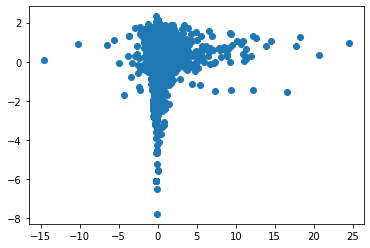

In [ ]:
plt.scatter(profit,fair)

In [ ]:
import random


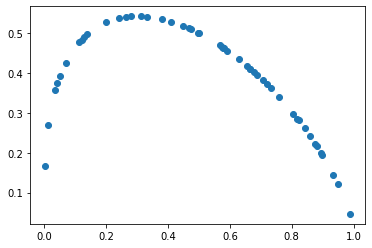

In [ ]:
#profit, fair = truncate(profit, fair, 0.5)

x = np.array([random.random() for i in range(0,50)])
y = 1-x
plt.scatter(x, x**0.3*y**0.7)
#plt.scatter(profit, fair)

In [ ]:
x

[0.04764853329815999,
 0.8881220767002826,
 0.7498901262152281,
 0.21407509549279324,
 0.621117442273505,
 0.13757812148867488,
 0.9825716194996903,
 0.10602929862764965,
 0.6811162590506773,
 0.7141696364534783,
 0.46155115658830925,
 0.7035625179022112,
 0.4295281796869077,
 0.8705364907155282,
 0.8179373435073669,
 0.6738314007909868,
 0.2347708460160688,
 0.3227069029080293,
 0.38701539557028486,
 0.7261187314476646,
 0.16668867975315738,
 0.16578904376098402,
 0.06113788337214332,
 0.9084308546373084,
 0.974458291961609,
 0.9957052042352964,
 0.9959414935140896,
 0.10665205143582157,
 0.34185841673922057,
 0.4209927909991583,
 0.5911206334847734,
 0.2607083086794757,
 0.6668050424804409,
 0.2204456691416119,
 0.25523196030039674,
 0.7548779533381211,
 0.4764497736735065,
 0.6064619901681677,
 0.7784171837380005,
 0.06562632738901153,
 0.7913352125484585,
 0.41864634288613944,
 0.7446162931211593,
 0.7817331640887739,
 0.9241595922059335,
 0.7264820273807802,
 0.6653485306189417,
 

# Linear Regression

## F1

In [ ]:
df = F1.merge(fairness, how='left', on=['unitid', 'year'])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
unitid,unitid,0.000000
"Tuition and fees, after deducting discounts and allowances","Tuition and fees, after deducting discounts an...",0.000000
Federal operating grants and contracts,Federal operating grants and contracts,0.000000
State operating grants and contracts,State operating grants and contracts,0.000000
Local/private operating grants and contracts,Local/private operating grants and contracts,0.000000
Local operating grants and contracts,Local operating grants and contracts,0.000000
Private operating grants and contracts,Private operating grants and contracts,0.000000
Sales and services of auxiliary enterprises,Sales and services of auxiliary enterprises,16.043956
Sales and services of hospitals,Sales and services of hospitals,63.533390
Sales and services of educational activities,Sales and services of educational activities,0.000000


In [ ]:
to_keep = missing_value_df[missing_value_df.percent_missing < 30].column_name.values

In [ ]:
F1_fair = F1.merge(fairness, how='left', on=['unitid', 'year'])[to_keep].select_dtypes(include=[np.number])
F1_fair = F1_fair.dropna()
y = F1_fair[['edu_fairness_score']]
X = F1_fair.drop(['edu_fairness_score', 'year', 'unitid'], axis=1)

reg = LinearRegression().fit(X, y)

In [ ]:
import statsmodels.api as sm
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler

X_col = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = X_col
X = X.drop(['Gini_gender','Gini_ethnics','Gini_income'],axis=1)
#y = (y - np.mean(y))/np.std(y)

X2 = sm.add_constant(X)
est = sm.OLS(y.values, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     66.28
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          1.43e-282
Time:                        00:48:12   Log-Likelihood:                -11304.
No. Observations:                8462   AIC:                         2.266e+04
Df Residuals:                    8438   BIC:                         2.283e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
F1 = F1.drop(['Instruction - Current year total', 'Student services - Current year total', 'Auxiliary enterprises -- Current year total', 'Scholarships and fellowships expenses -- Current year total', 'State nonoperating grants', 'Federal nonoperating grants', 'State appropriations', 'Local appropriations, education district taxes, and similar support', 'Local operating grants and contracts', 'Federal operating grants and contracts'], axis = 1)



In [ ]:
F1 = F1.drop(['Local nonoperating grants'], axis=1)

# New F1


In [ ]:
fairness = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/Final_Education_Fairness.csv", index_col = 0)
F1 = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/Financial_F1.csv", index_col = 0)

In [ ]:
fairness.head()

,year,unitid,Gini_gender,Gini_ethnics,Gini_income,edu_fairness_score
0,2020,100654,0.475454,0.261646,0.947475,0.561525
1,2020,100663,0.468154,0.612462,0.955800,0.678806
3,2020,100706,0.498441,0.518136,0.960979,0.659185
4,2020,100724,0.467202,0.204233,0.946293,0.539243
5,2020,100751,0.493823,0.435500,0.969612,0.632978


In [ ]:
F1['year'] = F1['year'].replace([1415,1516,1617,1718,1819,1920,2021], [2015,2016,2017,2018,2019,2020,2021])
F1 = F1[F1['year'] != 2021]

In [ ]:
F1.head()

,unitid,"Tuition and fees, after deducting discounts and allowances",Federal operating grants and contracts,State operating grants and contracts,Local/private operating grants and contracts,Local operating grants and contracts,Private operating grants and contracts,Sales and services of auxiliary enterprises,Sales and services of hospitals,Sales and services of educational activities,...,Academic support - Current year total,Student services - Current year total,Institutional support - Current year total,Operation maintenance of plant - Current year total,Scholarships and fellowships expenses -- Current year total,Auxiliary enterprises -- Current year total,Hospital services - Current year total,Independent operations - Current year total,Total Profit,year
0,100654,44478131,24166519,831411,693319,0,693319,13435517.0,0.000000e+00,2938358,...,7469575,17112095,31906733,0.0,16282814.0,12745315.0,0.000000e+00,0.0,3237071.0,2015
1,100663,169724524,332585972,10314365,55062949,1517304,53545645,32830327.0,1.515127e+09,60916483,...,174340904,36186665,135140397,0.0,21113044.0,64504845.0,1.370061e+09,0.0,31527362.0,2015
2,100706,53743262,68128682,4689746,2253842,0,2253842,7466287.0,0.000000e+00,4159834,...,13017908,18648547,23796728,0.0,1128515.0,9986734.0,0.000000e+00,0.0,-17322838.0,2015
3,100724,42073093,9088452,4371313,2426675,0,2426675,7588903.0,0.000000e+00,0,...,12502469,17115864,32484351,0.0,19421243.0,10564753.0,0.000000e+00,0.0,-9835537.0,2015
4,100733,0,0,0,0,0,0,0.0,NaN,0,...,0,0,0,0.0,0.0,0.0,NaN,NaN,1673867.0,2015


In [ ]:
F1 = F1.merge(fairness[['year', 'unitid', 'edu_fairness_score']], on=['year', 'unitid'], how='left')

In [ ]:
F1.head()

,unitid,"Tuition and fees, after deducting discounts and allowances",Federal operating grants and contracts,State operating grants and contracts,Local/private operating grants and contracts,Local operating grants and contracts,Private operating grants and contracts,Sales and services of auxiliary enterprises,Sales and services of hospitals,Sales and services of educational activities,...,Student services - Current year total,Institutional support - Current year total,Operation maintenance of plant - Current year total,Scholarships and fellowships expenses -- Current year total,Auxiliary enterprises -- Current year total,Hospital services - Current year total,Independent operations - Current year total,Total Profit,year,edu_fairness_score
0,100654,44478131,24166519,831411,693319,0,693319,13435517.0,0.000000e+00,2938358,...,17112095,31906733,0.0,16282814.0,12745315.0,0.000000e+00,0.0,3237071.0,2015,0.544967
1,100663,169724524,332585972,10314365,55062949,1517304,53545645,32830327.0,1.515127e+09,60916483,...,36186665,135140397,0.0,21113044.0,64504845.0,1.370061e+09,0.0,31527362.0,2015,0.668004
2,100706,53743262,68128682,4689746,2253842,0,2253842,7466287.0,0.000000e+00,4159834,...,18648547,23796728,0.0,1128515.0,9986734.0,0.000000e+00,0.0,-17322838.0,2015,0.660246
3,100724,42073093,9088452,4371313,2426675,0,2426675,7588903.0,0.000000e+00,0,...,17115864,32484351,0.0,19421243.0,10564753.0,0.000000e+00,0.0,-9835537.0,2015,0.535328
4,100733,0,0,0,0,0,0,0.0,NaN,0,...,0,0,0.0,0.0,0.0,NaN,NaN,1673867.0,2015,NaN


In [ ]:
new_profit = F1.sum()

In [ ]:
df = F1
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

,column_name,percent_missing
unitid,unitid,0.000000
"Tuition and fees, after deducting discounts and allowances","Tuition and fees, after deducting discounts an...",0.000000
Federal operating grants and contracts,Federal operating grants and contracts,0.000000
State operating grants and contracts,State operating grants and contracts,0.000000
Local/private operating grants and contracts,Local/private operating grants and contracts,0.000000
Local operating grants and contracts,Local operating grants and contracts,0.000000
Private operating grants and contracts,Private operating grants and contracts,0.000000
Sales and services of auxiliary enterprises,Sales and services of auxiliary enterprises,16.018268
Sales and services of hospitals,Sales and services of hospitals,63.531800
Sales and services of educational activities,Sales and services of educational activities,0.000000


In [ ]:
to_keep = missing_value_df[missing_value_df.percent_missing < 30].column_name.values

In [ ]:
#F1 = F1[to_keep]
F1 = F1.drop(['Local/private operating grants and contracts'],axis =1)

In [ ]:
F1 = F1[to_keep]

In [ ]:
F1.head()

,unitid,"Tuition and fees, after deducting discounts and allowances",Federal operating grants and contracts,State operating grants and contracts,Local/private operating grants and contracts,Local operating grants and contracts,Private operating grants and contracts,Sales and services of auxiliary enterprises,Sales and services of educational activities,Federal appropriations,...,Research - Current year total,Public service - Current year total,Academic support - Current year total,Student services - Current year total,Institutional support - Current year total,Scholarships and fellowships expenses -- Current year total,Auxiliary enterprises -- Current year total,Total Profit,year,edu_fairness_score
0,100654,44478131,24166519,831411,693319,0,693319,13435517.0,2938358,2561046,...,8695373,18301686,7469575,17112095,31906733,16282814.0,12745315.0,3237071.0,2015,0.544967
1,100663,169724524,332585972,10314365,55062949,1517304,53545645,32830327.0,60916483,0,...,263499157,153195970,174340904,36186665,135140397,21113044.0,64504845.0,31527362.0,2015,0.668004
2,100706,53743262,68128682,4689746,2253842,0,2253842,7466287.0,4159834,0,...,73230600,6389466,13017908,18648547,23796728,1128515.0,9986734.0,-17322838.0,2015,0.660246
3,100724,42073093,9088452,4371313,2426675,0,2426675,7588903.0,0,0,...,2783180,6285831,12502469,17115864,32484351,19421243.0,10564753.0,-9835537.0,2015,0.535328
4,100733,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,1673867.0,2015,NaN


In [ ]:
F1.columns

Index(['unitid', 'Tuition and fees, after deducting discounts and allowances',
       'Federal operating grants and contracts',
       'State operating grants and contracts',
       'Local/private operating grants and contracts',
       'Local operating grants and contracts',
       'Private operating grants and contracts',
       'Sales and services of auxiliary enterprises',
       'Sales and services of educational activities',
       'Federal appropriations', 'State appropriations',
       'Local appropriations, education district taxes, and similar support',
       'Federal nonoperating grants', 'State nonoperating grants',
       'Local nonoperating grants',
       'Gifts, including contributions from affiliated organizations',
       'Instruction - Current year total', 'Research - Current year total',
       'Public service - Current year total',
       'Academic support - Current year total',
       'Student services - Current year total',
       'Institutional support - Curren

In [ ]:
F1.to_csv('Financial_F1.csv')

In [ ]:
y = F1.dropna()[['edu_fairness_score']]
X = F1.dropna().drop(['edu_fairness_score'],axis =1)

In [ ]:
X

,unitid,"Tuition and fees, after deducting discounts and allowances",State operating grants and contracts,Private operating grants and contracts,Sales and services of auxiliary enterprises,Sales and services of educational activities,Federal appropriations,"Gifts, including contributions from affiliated organizations",Research - Current year total,Public service - Current year total,Academic support - Current year total,Institutional support - Current year total,Total Profit,year
0,100654,44478131,831411,693319,13435517.0,2938358,2561046,1901250,8695373,18301686,7469575,31906733,3237071.0,2015
1,100663,169724524,10314365,53545645,32830327.0,60916483,0,54203316,263499157,153195970,174340904,135140397,31527362.0,2015
2,100706,53743262,4689746,2253842,7466287.0,4159834,0,5930707,73230600,6389466,13017908,23796728,-17322838.0,2015
3,100724,42073093,4371313,2426675,7588903.0,0,0,372863,2783180,6285831,12502469,32484351,-9835537.0,2015
5,100751,452717202,27275883,5101388,172792048.0,11232780,0,53728959,59670300,50876526,89483228,102398143,78465326.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,487162,8103038,0,0,0.0,941092,0,223408,0,0,2980490,14546481,-856587.0,2020
11810,487320,28551856,3469095,748595,6524262.0,4713628,0,1620575,436427,25898,22700375,38126575,-5925801.0,2020
11812,488730,7141813,0,0,261967.0,0,0,11489,0,0,4470388,4292595,2130728.0,2020
11821,490805,55792743,702678,1205588,0.0,5462245,0,1044988,4004626,3453929,12946033,27529786,-1115476.0,2020


In [ ]:
profit = np.zeros(len(X))
for i in X.drop(['unitid', 'year'],axis=1).columns:
    profit += X[i].values

In [ ]:
profit_df = pd.DataFrame()
profit_df['profit'] =profit

In [ ]:
F1.corr()

,unitid,"Tuition and fees, after deducting discounts and allowances",Federal operating grants and contracts,State operating grants and contracts,Local/private operating grants and contracts,Local operating grants and contracts,Private operating grants and contracts,Sales and services of auxiliary enterprises,Sales and services of educational activities,Federal appropriations,...,Research - Current year total,Public service - Current year total,Academic support - Current year total,Student services - Current year total,Institutional support - Current year total,Scholarships and fellowships expenses -- Current year total,Auxiliary enterprises -- Current year total,Total Profit,year,edu_fairness_score
unitid,1.000000,-0.132074,-0.090668,-0.125662,-0.048713,-0.018317,-0.049329,-0.057546,-0.057411,-0.025820,...,-0.089016,-0.073273,-0.128287,-0.223739,-0.148619,-0.190736,-0.066151,0.003948,-0.000634,-0.332031
"Tuition and fees, after deducting discounts and allowances",-0.132074,1.000000,0.774537,0.527878,0.516262,0.114555,0.554411,0.829945,0.474869,0.006660,...,0.778324,0.535695,0.836246,0.815333,0.654055,0.761140,0.855302,0.241180,0.019257,0.183333
Federal operating grants and contracts,-0.090668,0.774537,1.000000,0.566527,0.724368,0.279827,0.730568,0.735175,0.582175,0.020955,...,0.953288,0.605758,0.832303,0.602393,0.625008,0.595698,0.779462,0.265795,0.016606,0.138722
State operating grants and contracts,-0.125662,0.527878,0.566527,1.000000,0.503109,0.221149,0.496767,0.462689,0.374128,0.005597,...,0.610185,0.459638,0.548726,0.490175,0.469678,0.430140,0.474269,0.158809,0.036761,0.197728
Local/private operating grants and contracts,-0.048713,0.516262,0.724368,0.503109,1.000000,0.550387,0.943354,0.468904,0.444380,0.011150,...,0.779929,0.603973,0.640226,0.428969,0.501421,0.418320,0.480837,0.194530,0.014586,0.122030
Local operating grants and contracts,-0.018317,0.114555,0.279827,0.221149,0.550387,1.000000,0.242197,0.109462,0.239441,0.001123,...,0.321104,0.121142,0.243842,0.139485,0.191024,0.099523,0.116095,0.073258,-0.000411,0.109970
Private operating grants and contracts,-0.049329,0.554411,0.730568,0.496767,0.943354,0.242197,1.000000,0.501213,0.421250,0.012511,...,0.778730,0.653721,0.647089,0.443063,0.506777,0.446567,0.512438,0.190526,0.017113,0.110568
Sales and services of auxiliary enterprises,-0.057546,0.829945,0.735175,0.462689,0.468904,0.109462,0.501213,1.000000,0.435353,0.023739,...,0.723892,0.528436,0.721452,0.627650,0.570316,0.617446,0.975233,0.236497,0.001933,0.076643
Sales and services of educational activities,-0.057411,0.474869,0.582175,0.374128,0.444380,0.239441,0.421250,0.435353,1.000000,0.005601,...,0.605485,0.399895,0.707336,0.473404,0.385568,0.358889,0.489865,0.253924,0.009726,0.086936
Federal appropriations,-0.025820,0.006660,0.020955,0.005597,0.011150,0.001123,0.012511,0.023739,0.005601,1.000000,...,0.023376,0.020456,0.076416,0.129929,0.078856,0.072365,0.037132,0.081604,0.004101,-0.032006


In [ ]:
X=profit_df

In [ ]:
import statsmodels.api as sm
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler

X_col = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = X_col
#X = X.drop(['Gini_gender','Gini_ethnics','Gini_income'],axis=1)
#y = (y - np.mean(y))/np.std(y)

X2 = sm.add_constant(X)
est = sm.OLS(y.values**2, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           7.36e-33
Time:                        01:32:27   Log-Likelihood:                 9646.6
No. Observations:                8462   AIC:                        -1.929e+04
Df Residuals:                    8460   BIC:                        -1.928e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4207      0.001    500.011      0.0

# Feature Engineering

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
def drop_highNA(df, val):
    percent_missing = df.isnull().sum() * 100 / len(df)
    df = df[df.columns[(percent_missing < 30).values]]
    
    return df

def get_Xy(df):
    df = df.dropna()
    y = df[['edu_fairness_score']]
    X = df.drop(['unitid','year','edu_fairness_score'], axis=1)
    
    return X, y

def regression(X, y):
    X_col = X.columns
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X))
    X.columns = X_col
    #X = X.drop(['Gini_gender','Gini_ethnics','Gini_income'],axis=1)
    #y = (y - np.mean(y))/np.std(y)

    X2 = sm.add_constant(X)
    est = sm.OLS(y.values, X2)
    est2 = est.fit()
    
    return est2

def newprofit(df, coef_series):
    
    fairness = df[['edu_fairness_score']]
    year = df[['year']]
    idd = df[['unitid']]
    coef_series = est2.params
    neg_cols = coef_series.index[coef_series.values < 0]
    pos_cols = list(coef_series.index[coef_series.values >= 0])
    pos_cols.remove('const')

    new_profit = np.zeros(len(df))
    for i in neg_cols:
        new_profit += df[i]

    new_df = df[pos_cols]
    new_df['profit'] = new_profit
    new_df['edu_fairness_score'] = fairness
    new_df['year'] = year
    new_df['unitid'] = idd
    
    
    
    return new_df, neg_cols
    


In [ ]:
match_label = pd.read_csv('match_label.csv', index_col = 0)
fairness = pd.read_csv('Final_Education_Fairness.csv', index_col = 0)
F1 = pd.read_csv('Financial_F1.csv', index_col = 0)
F1.year = [2000+int(str(i)[2:]) for i in F1.year]

FileNotFoundError: ignored

In [ ]:
F1_all = F1.merge(fairness[['unitid', 'year', 'edu_fairness_score']], on=['unitid', 'year'], how='left')

In [ ]:
#F1_all = drop_highNA(F1_all, 30)
F1_all = F1
X, y = get_Xy(F1_all)
est2 = regression(X, y)

In [ ]:
F1_2, col = newprofit(F1_all, est2.params)

In [ ]:
F1_2 = drop_highNA(F1_2, 30)
X, y = get_Xy(F1_2)
est2 = regression(X, y)

In [ ]:
F1_2.head()

In [ ]:
print(est2.summary())


In [ ]:
Income = ['Tuition and fees, after deducting discounts and allowances',
       #'Local/private operating grants and contracts',
       'Private operating grants and contracts',
       #'Sales and services of auxiliary enterprises',
       'Sales and services of educational activities',
       #'Federal appropriations',
       'Gifts, including contributions from affiliated organizations'
       ]
#Expense = ['Student services - Current year total',
#           'Institutional support - Current year total',
#           'Scholarships and fellowships expenses -- Current year total']
# Expense = ['Instruction - Current year total',
#            'Student services - Current year total',
#            'Institutional support - Current year total',
#            'Scholarships and fellowships expenses -- Current year total']
Expense = ['Student services - Current year total',
           'Instruction - Current year total',
           'Scholarships and fellowships expenses -- Current year total',
           'Research - Current year total',
           'Academic support - Current year total']

In [ ]:
Income = ['Tuition and fees, after deducting discounts and allowances',
       'Private operating grants and contracts',
       'Sales and services of educational activities',
       'Gifts, including contributions from affiliated organizations'
       ]
Expense = ['Student services - Current year total',
           'Instruction - Current year total',
           'Scholarships and fellowships expenses -- Current year total',
           'Research - Current year total',
           'Academic support - Current year total']

In [ ]:
total_profit = np.zeros(len(F1_all))
for i in Income:
    total_profit += F1_all[i]

for e in Expense:
    total_profit = F1_all[i]
    

In [ ]:
'Public service - Current year total'                                   
'Institutional support - Current year total'                            
'Scholarships and fellowships expenses -- Current year total'            
'Auxiliary enterprises -- Current year total'

In [ ]:
F1_3 = F1_all.drop(Income, axis = 1).drop(Expense, axis=1).drop(columns = ['Total Profit','Sales and services of auxiliary enterprises','Public service - Current year total','Institutional support - Current year total','Auxiliary enterprises -- Current year total','Local/private operating grants and contracts'])
F1_3['profit'] = total_profit

In [63]:
F1_3 = pd.read_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/financial_f1_profit.csv",index_col = 0)

In [64]:
F1_3.head()

,unitid,Federal operating grants and contracts,State operating grants and contracts,Local operating grants and contracts,Federal appropriations,State appropriations,"Local appropriations, education district taxes, and similar support",Federal nonoperating grants,State nonoperating grants,Local nonoperating grants,year,edu_fairness_score,profit
0,100654,24166519,831411,0,2561046,40102843,0,15098992,0,0,2015,0.544967,1901250
1,100663,332585972,10314365,1517304,0,265293488,0,28304839,115969,0,2015,0.668004,54203316
2,100706,68128682,4689746,0,0,43997235,0,7670824,0,0,2015,0.660246,5930707
3,100724,9088452,4371313,0,0,41880782,0,16340329,0,0,2015,0.535328,372863
4,100733,0,0,0,0,0,0,0,0,0,2015,NaN,0


In [ ]:
#F1_3.dropna(inplace = True)

In [65]:
def get_Xy(df):
    df = df.dropna()
    y = df[['edu_fairness_score']]
    X = df.drop(['unitid','year','edu_fairness_score'], axis=1)
    
    return X, y

In [ ]:
y.values

In [66]:
def regression(X, y):
    X_col = X.columns
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X))
    X.columns = X_col
    #X = X.drop(['Gini_gender','Gini_ethnics','Gini_income'],axis=1)
    #y = (y - np.mean(y))/np.std(y)

    X2 = sm.add_constant(X)
    est = sm.OLS(y.values, X2)
    est2 = est.fit()
    
    return est2

In [67]:
F1_3 = drop_highNA(F1_3, 30)
X, y = get_Xy(F1_3)

In [ ]:
X

In [68]:
est2 = regression(X, y)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
F1_3.shape

In [ ]:
percent_missing = F1_3.isnull().sum() * 100 / len(F1_3)
missing_value_df = pd.DataFrame({'column_name': F1_3.columns,
                                 'percent_missing': percent_missing})

In [ ]:
missing_value_df

In [69]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     228.0
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:34:03   Log-Likelihood:                 13220.
No. Observations:               10916   AIC:                        -2.642e+04
Df Residuals:                   10905   BIC:                        -2.634e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
F1_3.to_csv("/content/drive/MyDrive/Data Open Championship 2022/Cleaned dataset/Financial_F1_Profit.csv")

In [ ]:
F1_3.columns

In [ ]:
F1_3.corr()